In [11]:
import numpy as np
import pandas as pd
from tqdm import tqdm as tqdm

In [12]:
ls

data/  EDA.ipynb


100%|██████████| 25/25 [01:00<00:00,  2.65s/it]


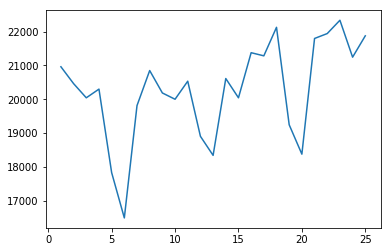

In [67]:
# 统计进出站每天的变化情况
daily_count = []
for i in tqdm(range(1,26)):
    if i<10:
        s = '0'+str(i)
    else:
        s = str(i)
    day_i = pd.read_csv('data/Metro_train/record_2019-01-%s.csv'%s)
    daily_count.append(day_i[day_i.stationID==19].shape[0])
from matplotlib import pyplot as plt
plt.figure()
plt.plot(range(1,26),daily_count)
plt.show()

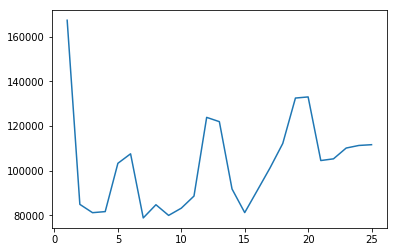

In [66]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(range(1,26),daily_count)
plt.show()

In [61]:
pd.read_csv('data/Metro_testA/testA_record_2019-01-28.csv').shape[0]

2404894

In [18]:
# 数据周期性分布
# 数据可能受天气等因素影响
# TODO
# 统计天气信息/活动信息（百度搜索量）

In [20]:
day_i['time'] = pd.to_datetime(day_i.time)


In [23]:
day_i.dtypes

time         datetime64[ns]
lineID               object
stationID             int64
deviceID              int64
status                int64
userID               object
payType               int64
dtype: object

In [ ]:
"data['diff_purchase_date'] = data['new_purchase_date']-data['hist_purchase_date']\n",
    "data['diff_purchase_date'] = data['diff_purchase_date'].dt.days"

In [27]:
5//3

1

In [43]:
day_i['minute_count'] = (day_i['time'].dt.minute+day_i['time'].dt.hour*60)//10

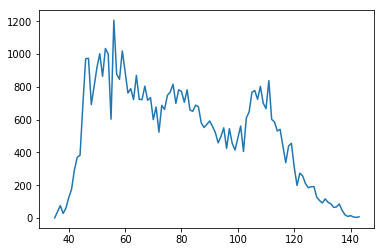

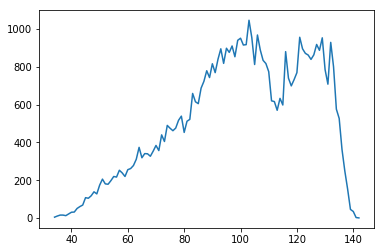

In [55]:
# 统计某天内某个站点的客流分布情况
sid = 9
for i in range(0,2):
    come = day_i[(day_i.stationID==sid) &(day_i.status==i)]
    come = come[['minute_count','status']].groupby(['minute_count'],as_index=False).agg({'status':'count'})

    plt.figure()
    plt.plot(come['minute_count'],come['status'])
    plt.show()

  0%|          | 0/19 [00:00<?, ?it/s]

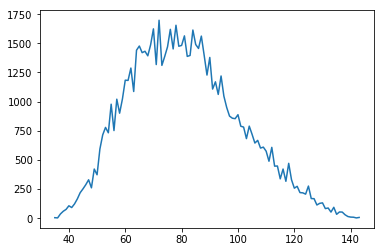

  5%|▌         | 1/19 [00:03<00:56,  3.12s/it]

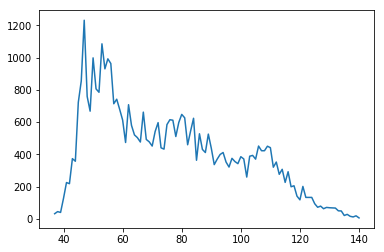

 11%|█         | 2/19 [00:06<00:52,  3.09s/it]

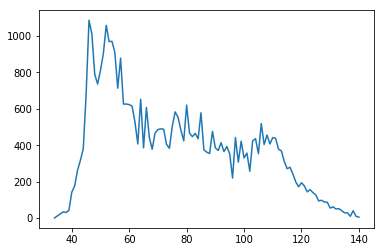

 16%|█▌        | 3/19 [00:08<00:47,  2.99s/it]

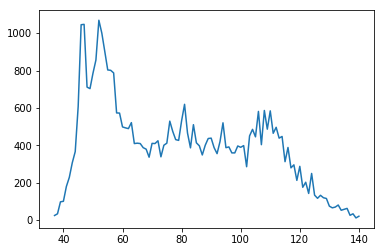

 21%|██        | 4/19 [00:11<00:44,  2.98s/it]

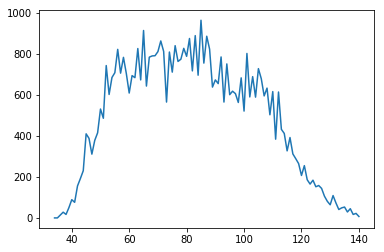

 26%|██▋       | 5/19 [00:14<00:39,  2.81s/it]

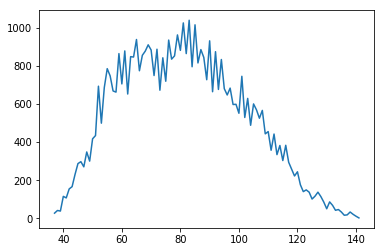

 32%|███▏      | 6/19 [00:16<00:34,  2.69s/it]

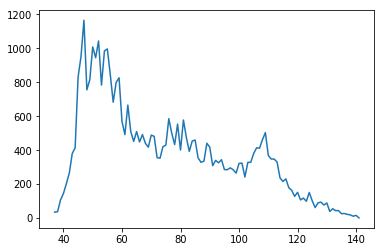

 37%|███▋      | 7/19 [00:19<00:32,  2.68s/it]

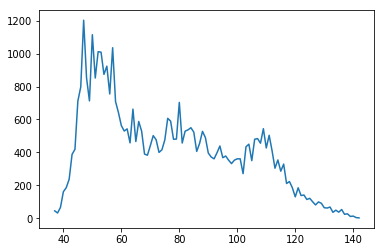

 42%|████▏     | 8/19 [00:22<00:29,  2.69s/it]

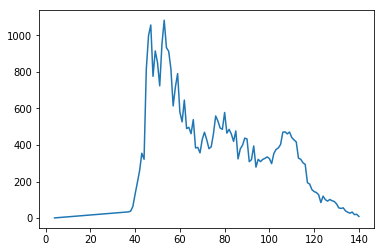

 47%|████▋     | 9/19 [00:24<00:26,  2.68s/it]

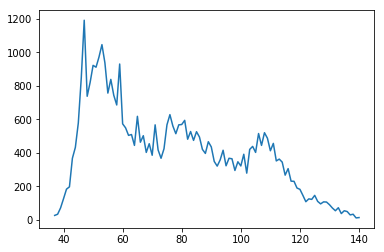

 53%|█████▎    | 10/19 [00:27<00:25,  2.84s/it]

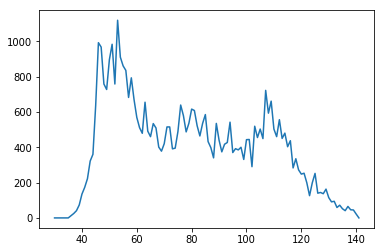

 58%|█████▊    | 11/19 [00:31<00:24,  3.04s/it]

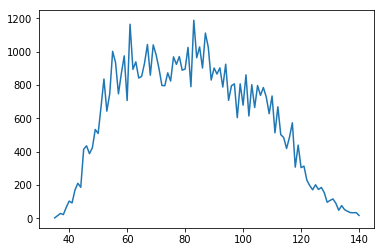

 63%|██████▎   | 12/19 [00:34<00:21,  3.02s/it]

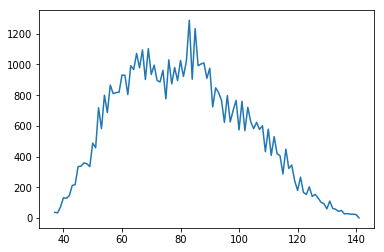

 68%|██████▊   | 13/19 [00:37<00:17,  2.98s/it]

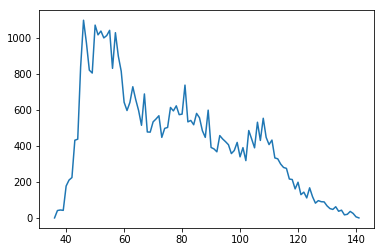

 74%|███████▎  | 14/19 [00:40<00:15,  3.10s/it]

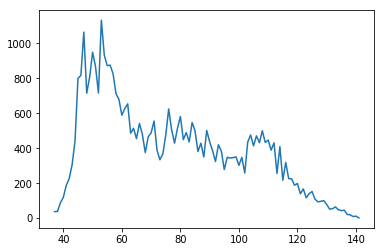

 79%|███████▉  | 15/19 [00:43<00:12,  3.15s/it]

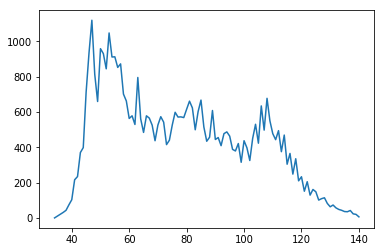

 84%|████████▍ | 16/19 [00:47<00:09,  3.19s/it]

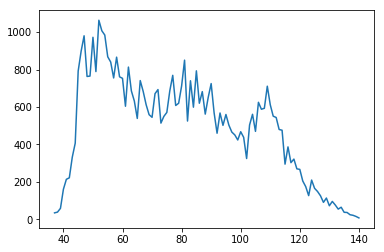

 89%|████████▉ | 17/19 [00:50<00:06,  3.29s/it]

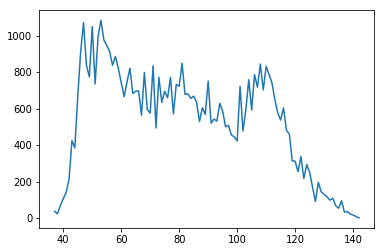

 95%|█████████▍| 18/19 [00:54<00:03,  3.40s/it]

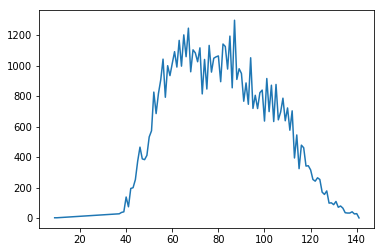

100%|██████████| 19/19 [00:57<00:00,  3.28s/it]


In [63]:
for i in tqdm(range(1,20)):
    if i<10:
        s = '0'+str(i)
    else:
        s = str(i)
    day_i = pd.read_csv('data/Metro_train/record_2019-01-%s.csv'%s)
    sid = 9
    day_i['time'] = pd.to_datetime(day_i.time)
    day_i['minute_count'] = (day_i['time'].dt.minute+day_i['time'].dt.hour*60)//10
    for i in range(0,1):
        come = day_i[(day_i.stationID==sid) &(day_i.status==i)]
        come = come[['minute_count','status']].groupby(['minute_count'],as_index=False).agg({'status':'count'})

        plt.figure()
        plt.plot(come['minute_count'],come['status'])
        plt.show()

In [8]:
day1[day1.userID=='Dcd94427fc614effc9c06dd8211daa86c']

,time,lineID,stationID,deviceID,status,userID,payType
730830,2019-01-03 10:04:50,B,24,1222,1,Dcd94427fc614effc9c06dd8211daa86c,3
803758,2019-01-03 10:49:22,B,9,446,0,Dcd94427fc614effc9c06dd8211daa86c,3


In [20]:
day1[day1.stationID==8]['deviceID'].nunique()

32